In [12]:
# Installing all the necessary packages
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
# Loading the data
mnist= fetch_mldata('MNIST original')
print mnist.data.shape
print np.unique(mnist.target)

(70000, 784)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [5]:
# Extracting the images and their labels (3 and 8)
n = len(mnist.data[(mnist.target == 3) | (mnist.target == 8)])
images = mnist.data[(mnist.target == 3) 
                    | (mnist.target == 8)].reshape((n, -1))
labels = mnist.target[(mnist.target == 3) | (mnist.target == 8)]
print images.shape, labels.shape

(13966, 784) (13966,)


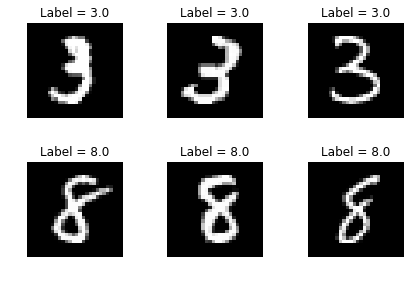

In [6]:
# Plotting some of the images from the dataset
ROW = 2
COLUMN = 3
j = 1
# Choose some random pictires and plot them
for i in [1, 2700, 5000, 10000, 13000, 13950]:
    # images[i] is the i-th image data with size 28x28
    image = images[i].reshape(28, 28)
    # Create subplots to plot the images in a more compact way
    plt.subplot(ROW, COLUMN, j) 
    # cmap='gray' is for black and white pictures.
    plt.imshow(image, cmap='gray')  
    # labels[i] is the i-th digit label
    plt.title('Label = {}'.format(labels[i]))
    plt.axis('off')  # do not show axis value
    j += 1
plt.tight_layout()   # Automatic padding between subplots
plt.show()

In [21]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2)

# I initially tried to train the model on the entire dataset.
# Unfortunately, it took way too long so I decided
# to reduce the dataset to 50%.
# The number of datapoints is still big enough,
# and my computer can run it successfully.
X_reduced = X[:int(0.5*len(X))]
X_t_reduced = X_test[:int(0.5*len(X_test))]
y_reduced = y[:int(0.5*len(y))]
y_t_reduced = y_test[:int(0.5*len(y_test))]

for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel)
    print "\n Training time for the {} kernel:".format(kernel)
    % timeit clf.fit(X_reduced, y_reduced)  
    print "\n Prediction time for the {} kernel:".format(kernel)
    % timeit clf.predict(X_t_reduced)
    print "\n Test Accuracy: {}".format(clf.score
                                    (X_t_reduced, y_t_reduced))


 Training time for the linear kernel:
1 loop, best of 3: 22 s per loop

 Prediction time for the linear kernel:
1 loop, best of 3: 472 ms per loop

 Test Accuracy: 0.940586972083

 Training time for the poly kernel:
1 loop, best of 3: 3.45 s per loop

 Prediction time for the poly kernel:
1 loop, best of 3: 794 ms per loop

 Test Accuracy: 0.989978525412

 Training time for the rbf kernel:
1 loop, best of 3: 27.8 s per loop

 Prediction time for the rbf kernel:
1 loop, best of 3: 6.33 s per loop

 Test Accuracy: 0.511095204009


In the cell above, I trained and predicted the label using different kernels: RBF, linear, and polynomial. The purpose of kernel functions is to return the inner product between two points in a suitable feature space by defining a notion of similarity, with the little computational cost even in very high-dimensional spaces. 

The linear kernel is the most intuitive of all functions as it doesn't map the data into higher dimensions. It managed to achieve a high level of precision (94%) which indicates that the data is linearly separable. It is also the fastest kernel out of all.

The polynomial kernel represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models. It performed a little bit better (98%) than the linear kernel and is also reasonably fast.

The last kernel, RBF, is defined regarding the standard Euclidean norm of the input vector. It's been shown that the linear kernel is a degenerate version of RBF since it is never more accurate than a properly tuned RBF kernel. In the cell above, you can see that the RBF kernel performs significantly worse than both the linear and the polynomial kernel. It is an indicator that the kernel is not tuned properly. In the next cell, I will use the GridSearch function to search for appropriate parameters and potentially improve the performance of this kernel.

In [20]:
clf = svm.SVC(kernel="rbf")
c_range = np.logspace(2,4,3)
gamma_range = np.logspace(-8,-6,3)
params = {"C":c_range, "gamma": gamma_range}
grid_search = GridSearchCV(svc, params)

print "\n Training time for the rbf kernel:"
% timeit grid_search.fit(X_reduced,y_reduced)
print "\n Prediction time for the rbf kernel:"
% timeit grid_search.predict(X_reduced)
print "\n Test Accuracy: {}".format(grid_search.score
                            (X_t_reduced, y_t_reduced))


 Training time for the rbf kernel:
1 loop, best of 3: 54.9 s per loop

 Prediction time for the rbf kernel:
1 loop, best of 3: 725 ms per loop

 Test Accuracy: 0.982078853047


As you can see, the accuracy has significantly increased which illustrates that a properly tuned RBF kernel performs at least as good as the linear one. The only problem is that it requires much more time since the GridSearch function looks through all the combinations of parameters. In this concrete case, the performance of both the linear and polynomial kernel is good enough, so there is no need to train the RBF kernel. However, if the two datasets were not linearly separable, we would see a much higher difference in accuracy.